In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Loading the CSV file 
df = pd.read_csv('/content/Kent2.csv')

# stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatize = WordNetLemmatizer()

# Preprocessing steps
def pre_process_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs, mentions, and hashtags
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize text
    words = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize words
    words = [lemmatize.lemmatize(word) for word in words if word not in stop_words]
    # Join words back into a string
    processed_text = ' '.join(words)
    return processed_text

# preprocessing to the text column
df['processed_text'] = df['content'].apply(pre_process_text)

# Save the new dataset to a  CSV file
df.to_csv('kentstate.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.head()

,content,hashtag,timestamp,User,processed_text
0,We are pleased to announce that our Patzún hui...,KentState,2023-05-05 21:01:30+00:00,Friendship Bridge,pleased announce patzún huipil exhibit univers...
1,Turned in my office key today. Left this note....,KentState,2023-05-05 21:01:08+00:00,Beverly J Bain,turned office key today left note love
2,@ConnieSchultz @KentState I didn’t know you we...,KentState,2023-05-05 20:57:28+00:00,Ken Bane,didnt know leaving ksu best luck know youll ke...
3,"On the anniversary of , here's something l wro...",KentState,2023-05-05 20:53:23+00:00,Devon (Human Circus Podcast),anniversary here something l wrote last year g...
4,@ConnieSchultz @KentState What a great loss fo...,KentState,2023-05-05 20:50:15+00:00,Beth Philley,great loss flash


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# CountVectorizer object
count_vectorizer = CountVectorizer()
# vectorizer and transforming the data for the word count matrix
word_count_matrix = count_vectorizer.fit_transform(df['processed_text'])
# vocabulary of unique words
vocab_dict = count_vectorizer.vocabulary_
print(vocab_dict)
print(len(vocab_dict))

print(word_count_matrix.toarray())

# Creating the TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()
# transforming the data to create a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])
print('New TF-IDF matrix:', tfidf_matrix.toarray())


{'pleased': 7021, 'announce': 1003, 'patzún': 6819, 'huipil': 4661, 'exhibit': 3537, 'university': 9524, 'may': 5887, '19july': 208, '15': 113, 'part': 6780, 'warp': 9793, 'member': 5956, 'show': 8225, 'global': 4138, 'community': 2295, 'value': 9619, 'importance': 4773, 'textile': 9033, 'art': 1120, 'learn': 5492, 'turned': 9375, 'office': 6537, 'key': 5245, 'today': 9163, 'left': 5507, 'note': 6444, 'love': 5689, 'didnt': 2917, 'know': 5300, 'leaving': 5500, 'ksu': 5343, 'best': 1480, 'luck': 5713, 'youll': 10133, 'keep': 5216, 'writing': 10049, 'used': 9578, 'look': 5664, 'forward': 3901, 'reading': 7489, 'work': 10008, 'every': 3488, 'week': 9838, 'pd': 6841, 'sunday': 8788, 'magazine': 5762, 'anniversary': 1002, 'here': 4500, 'something': 8436, 'wrote': 10053, 'last': 5440, 'year': 10102, 'garry': 4042, 'trudeau': 9330, 'tragedy': 9249, 'doonesbury': 3079, 'great': 4253, 'loss': 5678, 'flash': 3811, 'brave': 1670, 'move': 6187, 'next': 6353, 'challenge': 2007, 'grow': 4287, 'fine'

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# VADER sentiment analyzer
sa = SentimentIntensityAnalyzer()

# Function foor the polarity score using VADER
def get_sentiment_vader(text):
   
    polarity = sa.polarity_scores(text)['compound']
    
    if polarity > 0.2:
        return 1  # Positive sentiment
    elif polarity < -0.2:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

# Applying the sentiment analysis using VADER
df['sentiment'] = df['processed_text'].apply(get_sentiment_vader)

# Displaying the DataFrame
df.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,content,hashtag,timestamp,User,processed_text,sentiment
0,We are pleased to announce that our Patzún hui...,KentState,2023-05-05 21:01:30+00:00,Friendship Bridge,pleased announce patzún huipil exhibit univers...,1
1,Turned in my office key today. Left this note....,KentState,2023-05-05 21:01:08+00:00,Beverly J Bain,turned office key today left note love,1
2,@ConnieSchultz @KentState I didn’t know you we...,KentState,2023-05-05 20:57:28+00:00,Ken Bane,didnt know leaving ksu best luck know youll ke...,1
3,"On the anniversary of , here's something l wro...",KentState,2023-05-05 20:53:23+00:00,Devon (Human Circus Podcast),anniversary here something l wrote last year g...,-1
4,@ConnieSchultz @KentState What a great loss fo...,KentState,2023-05-05 20:50:15+00:00,Beth Philley,great loss flash,1


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D

tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(df['processed_text'])
X = tokenizer.texts_to_sequences(df['processed_text'])
X = pad_sequences(X, maxlen=100)

# converting labels to encoded vectors
y = to_categorical(df['sentiment'])

# splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Building the model
model = Sequential()
model.add(Embedding(5000, 128, input_length=100))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# training the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)


Epoch 1/5
29/29 [==============================] - 25s 339ms/step - loss: 0.6648 - accuracy: 0.6315 - val_loss: 0.6549 - val_accuracy: 0.6249
Epoch 2/5
29/29 [==============================] - 8s 282ms/step - loss: 0.5825 - accuracy: 0.6650 - val_loss: 0.5461 - val_accuracy: 0.7285
Epoch 3/5
29/29 [==============================] - 9s 321ms/step - loss: 0.3781 - accuracy: 0.8410 - val_loss: 0.4618 - val_accuracy: 0.7983
Epoch 4/5
29/29 [==============================] - 7s 258ms/step - loss: 0.1917 - accuracy: 0.9332 - val_loss: 0.5603 - val_accuracy: 0.7993
Epoch 5/5
29/29 [==============================] - 10s 337ms/step - loss: 0.1066 - accuracy: 0.9692 - val_loss: 0.6791 - val_accuracy: 0.8048


29/29 [==============================] - 3s 65ms/step
Accuracy: 0.8048
Precision: 0.8034
Recall: 0.7718
F1 Score: 0.7817
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.64      0.71       344
           1       0.81      0.90      0.85       573

    accuracy                           0.80       917
   macro avg       0.80      0.77      0.78       917
weighted avg       0.80      0.80      0.80       917



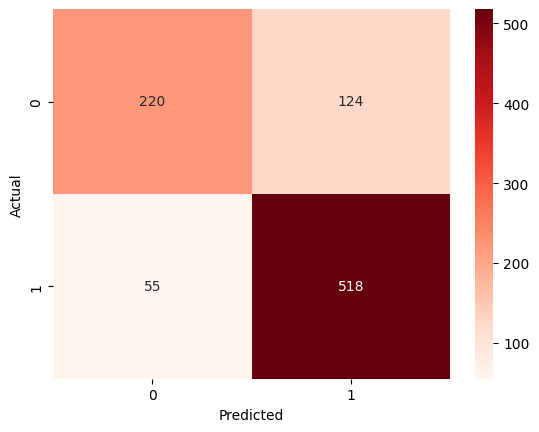

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# predictions on test data
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# performance metrics
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_labels)
precision = precision_score(np.argmax(y_test, axis=1), y_pred_labels, average='macro')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_labels, average='macro')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_labels, average='macro')

# classification report
classification_rep = classification_report(np.argmax(y_test, axis=1), y_pred_labels)

# performance metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Print the classification report
print("Classification Report:\n", classification_rep)

#confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_labels)

# Visualizing the data of confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [56]:
sentences = ["Remembering Elaine Holstein on the anniversary of the killing of her son",
             "effrey Miller while I was there and made us all feel like close friends!",
             "Thank you for this post. We need younger generations to know what our government did",
             "Her name is Mary Vecchio. The dead boy is Jeff Miller",
             "Proud  graduate here.",
             "More than 50,000 wild birds in UK killed by avian flu double previous estimates",
             "We're so grateful for amazing colleagues",
             "Horrible moment in history",
             "So proud of Richard",
             "Congrats @ScienceYael! Proud of your accomplishments"]

# Tokenizing and padding the new sentences
new_sequence_sentence = tokenizer.texts_to_sequences(sentences)
new_sequence_padded = pad_sequences(new_sequence_sentence, maxlen=200)

# Predicting the sentiment of the new sentences 
predictions = model.predict(new_sequence_padded)

# Printing the each sentence
for a in range(len(sentences)):
    sentiment = "Positive" if np.argmax(predictions[i]) == 1 else "Negative"
    print(sentences[a], ":", sentiment)


1/1 [==============================] - 0s 131ms/step
Remembering Elaine Holstein on the anniversary of the killing of her son : Positive
effrey Miller while I was there and made us all feel like close friends! : Positive
Thank you for this post. We need younger generations to know what our government did : Positive
Her name is Mary Vecchio. The dead boy is Jeff Miller : Positive
Proud  graduate here. : Positive
More than 50,000 wild birds in UK killed by avian flu double previous estimates : Positive
We're so grateful for amazing colleagues : Positive
Horrible moment in history : Positive
So proud of Richard : Positive
Congrats @ScienceYael! Proud of your accomplishments : Positive
